In [115]:
# 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np

In [116]:
# 파일 로딩
FILE = '../EXAM_DL/DAY_0901/data/diabetes.csv'

df = pd.read_csv(FILE)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [117]:
# 결측치 개수 파악
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [118]:
# 기술 통계 정보 확인
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [119]:
# 각 컬럼당 0값을 제외한 컬럼의 평균 값으로 채우기
df.Glucose[df['Glucose']==0] = df.Glucose[df['Glucose']!=0].mean()
df.BloodPressure[df['BloodPressure']==0] = df.BloodPressure[df['BloodPressure']!=0].mean()
df.SkinThickness[df['SkinThickness']==0] = df.SkinThickness[df['SkinThickness']!=0].mean()
df.BMI[df['BMI']==0] = df.BMI[df['BMI']!=0].mean()

## [1] 데이터 준비

In [120]:
X = df['Insulin']
y = df['Outcome']

In [121]:
# 학습에 사용할 수 있도록 형변환
arrX = np.array(X).reshape(-1, 1)
arrY = np.array(y).reshape(-1, 1)

In [122]:
# 데이터 체크
print('arrX : ', arrX.shape, 'arrY : ', arrY.shape)

arrX :  (768, 1) arrY :  (768, 1)


## [2] 데이터 확인 => 시각화

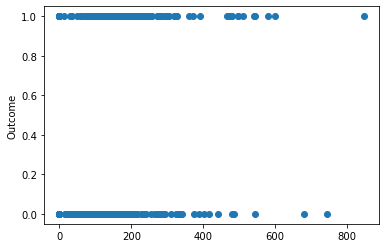

In [123]:
# 현재 데이터 시각화
plt.scatter(arrX, arrY)
plt.xlabel('')
plt.ylabel('Outcome')
plt.show()

## [3] 모델 생성 & 학습


In [124]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
arrX, arrY, random_state=42)

In [125]:
model = LogisticRegression()

In [126]:
# 학습
model.fit(train_input, train_target)

LogisticRegression()

In [127]:
# 학습 후 설정된 속성
print('분류 종류 : ', model.classes_)
print('가중치 값 : ', model.coef_)
print('절 편  값 : ', model.intercept_)
print('특성 갯수 : ', model.n_features_in_)

분류 종류 :  [0 1]
가중치 값 :  [[0.00220588]]
절 편  값 :  [-0.8233593]
특성 갯수 :  1


## [4] 평가 => score() 학습용 데이터 점수, 테스트용 데티어 점수
---
- 2개 점수 비교해서 과대적합, 과소적합 체크

In [128]:
print('train set score : ',
     model.score(train_input, train_target))
print('test set score : ',
     model.score(test_input, test_target))

train set score :  0.6597222222222222
test set score :  0.640625


## [5] 테스트 => predict() : 새로운 데이터로 진행

In [129]:
preY = model.predict(train_input)

In [130]:
preY

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [131]:
# 1개 데이터
preY = model.predict([[50]])
print('예측결과 : ', preY)

예측결과 :  [0]


In [132]:
probaY = model.predict_proba([[50]])
print('분류항목 : ', model.classes_)
print('예측확률 : ', probaY)

분류항목 :  [0 1]
예측확률 :  [[0.67107813 0.32892187]]


# 

# Scikit-learn ML 기본 동작
---
- 1) 데이서 수집 & 준비
- 2) 데이터 전처리
    * 데이터 / 타겟 분리
    * 데이터 표준화 / 정규화
    * 타겟(라벨) 인코딩
- 3) 학습위한 데이터 준비
    - 데이터 셋
        * 학습용 데이터셋 => 학습에 사용
        * 검증용 데이터셋 => 모델 생성 중에 사용
        * 테스트용 데이터셋 => 모델 완성 후 사용
- 4) 학습 모델 생성
    - 학습 방법 선정 및 모델 객체 생성
    - 학습 진행
        * 모델 파라미터 최적화 => 학습에 의해서 결정되는 파라미터
        * 최적의 모델 파라미터를 찾기 위한 방법 => 최적화(optimizer)
        * 예) w 가중치, b 절편
    - 모델 평가
        * 성능 개선 => 하이퍼파라미터 (모델마다 다름) => 모델 튜닝
        * 예) NNN -> K, 학습 횟수, 학습크기(배치 사이즈), 규제 값들
- 5) 모델 테스트
    - 학습에 사용되지 않은 데이터
    - 새로운 데이터로 테스트 진행

In [133]:
# 모듈 로딩
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [134]:
## [1] 데이터 준비
# 시간:점수
X = [2,4,6,8,10,12]
y=[40,50,60,70,80,90]

## [2] 데이터 분포 분셕 => EDA => 시각화

In [135]:
import matplotlib.pyplot as plt

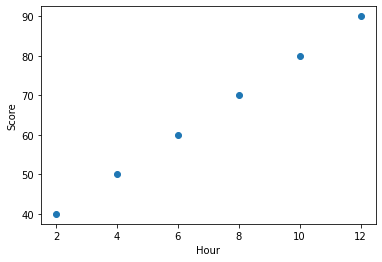

In [136]:
plt.scatter(X, y)
plt.xlabel('Hour')
plt.ylabel('Score')
plt.show()

- 시간과 점수는 비례 단계
- 선형의 데이터 분포
- 독립변수 => hour
- 종속변수 => score

In [137]:
# 학습에 사용되는 형태로 데이터 변환
import pandas as pd

df = pd.DataFrame({'Hour':X, 'Score':y})  # df = pd.DataFrame([X, y])
print('shape:', df.shape)

shape: (6, 2)


In [138]:
import numpy as np

arrX = np.array(X)
arrY = np.array(y)

print('arrX : ', arrX.shape, 'arry : ', arrY.shape )

arrX :  (6,) arry :  (6,)


In [139]:
# 1차원 -> 2차원
arrX = arrX.reshape(-1, 1)
print('arrX : ', arrX.shape, arrX.ndim, 'arry : ', arrY.shape, arrY.ndim)

arrX :  (6, 1) 2 arry :  (6,) 1


## [3] 학습 방법 선택 및 모델 생성
---
- 시간에 따른 점수 예측
- 데이터 + 라벨 => 지도학습
- 선형 데이터 분포 => 선형 모델 적용

In [140]:
# 모델 객체 생성
model = LinearRegression()

In [141]:
# 학습 => 트레이닝 데이터 사용
# fit()메서드 => 2차원 형태 데이터
model.fit(arrX, arrY)

LinearRegression()

In [142]:
# 모델 파라미터 => w 가중치, b 절편
print('w : ', model.coef_, 'b : ', model.intercept_)

w :  [5.] b :  29.999999999999993


## [4] 모델 평가
---
- 테스트(검증) 데이터로 평가
- score()
    - 분류 : 정답 --- 예측답 => 맞춘 정도
        * 정확도(accuracy)
    - 회귀 : 정답 --- 예측답 => 차이 오차(Error)
        * 손실함수(Loss/Cost Function) : MSE, MAE, RMSE 0 ~ 1 낮을수록 좋음
        * R2 계수 : 0 ~ 1 높을수록 좋음    

In [143]:
# 회귀 => 결정계수 R^2 반환
model.score(arrX, arrY)

1.0

In [144]:
# 오차 확인
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 예측값 추출
preY = model.predict(arrX)

mae = mean_absolute_error(arrY, preY)
mse = mean_squared_error(arrY, preY)

print(mae, mse)

1.1842378929335002e-15 8.414516322357459e-30


# 

# scikit-learn Dataset 사용
---
- 종류
    - load_datset() : scikit_learn 저장소에서 로딩
    - fetch_XXX () : dataset 저장소에서 가져오기
- 반환값 => Bunch 타입
    - dict 유사

In [145]:
# 모듈 로딩
from sklearn.datasets import load_diabetes

In [146]:
# 당뇨병 유무 => 8개 특성 + 1개 라벨
data = load_diabetes()

In [147]:
type(data)

sklearn.utils.Bunch

In [148]:
# dict에서 key로 value 접근
data['DESCR']

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, blood sugar

# 

# IRIS Dataset 활용 분류
---

In [149]:
# 모듈 로딩
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

## [1] 데이터 로딩 및 확인

In [150]:
# return_X_y => X => 특징들, 데이터 , y => 라벨, 타겟
data, target = load_iris(as_frame=True, return_X_y=True)

type(data), type(target)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [151]:
print(data.info(), data.head(3), sep='\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2


In [152]:
print(target.head(3), target.unique(), target.value_counts(), sep = '\n\n')

0    0
1    0
2    0
Name: target, dtype: int32

[0 1 2]

0    50
1    50
2    50
Name: target, dtype: int64


## [2] 학습 데이터 준비

In [153]:
# 데이터 => petal_length (cm), petal_width (cm)
# 타 겟 => 0 ,2
data = data.loc[:, data.columns[2:]]

print('data => ', data.shape)
print('target => ', target.shape)

data =>  (150, 2)
target =>  (150,)


In [154]:
data.drop(range(50, 100), inplace=True)
target.drop(range(50, 100), inplace=True)

In [155]:
# 학습툥, 테스트용 데이터 분리
from sklearn.model_selection import train_test_split

In [156]:
# train:test=75%:25%
# test_size=0.X
# stratify => 분류 항목 비율 맞추어서 데이터셋 설정
# random_state => 매번 동일하게 데이터 구성하는 경우 지정
train_X, test_X, train_y, test_y = train_test_split(data,
                                                   target,
                                                   test_size=0.2,
                                                   stratify=target,
                                                   random_state=4)

In [157]:
print(train_X.shape, test_X.shape,sep='\n')
print(train_y.value_counts(), test_y.value_counts(),sep='\n')

(80, 2)
(20, 2)
0    40
2    40
Name: target, dtype: int64
0    10
2    10
Name: target, dtype: int64


In [158]:
# 모델 생성 학습
model = LogisticRegression()

In [159]:
# 학습
model.fit(train_X, train_y)

LogisticRegression()

In [160]:
# 학습 후 설정된 속성
print('분류 종류: ', model.classes_)
print('가중치 값: ', model.coef_)
print('절 편  값: ', model.intercept_)
print('특성 갯수: ', model.n_features_in_)

분류 종류:  [0 2]
가중치 값:  [[1.87871631 0.84564202]]
절 편  값:  [-7.34250753]
특성 갯수:  2


In [161]:
# 평가 => score() 학습용 데이터 점수, 테스트용 데이터 점수

In [162]:
model.score(train_X, train_y)

1.0

In [163]:
# 테스트 => predict(): 새로운 데이터로 진행
preY = model.predict(train_X)

preY

array([0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2,
       0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2])

In [164]:
# 1개 데이터
preY = model.predict([[1, 1]])
print('예측결과 : ', preY)

예측결과 :  [0]


In [165]:
probaY = model.predict_proba([[1, 1]])
print('분류항목 : ', model.classes_)
print('예측확률 : ', probaY)

분류항목 :  [0 2]
예측확률 :  [[0.99022544 0.00977456]]


In [166]:
# 결정함수
model.decision_function([[1, 1]])

array([-4.6181492])

# 

# LogisticRegression
---
- 인공신경망의 기본 개념과 동일
- Regression이지만 이진분류로 사용
- 선형모델 기반으로 y=wx+b 그대로 사용
- y=wx+b의 결과 => 분류 변화 => sigmoid()

## 성적 - 합격/불합격 분류 실습

In [167]:
# 사용 모듈 로딩
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

### (1) 데이터 준비

In [168]:
X = [78,82,91,94,97]  # 점수
y = [0,0,1,1,1]  # 합격여부 (합격-1, 불합격-0)

In [169]:
# 학습에 사용할 수 있도록 형변환
arrX=np.array(X).reshape(-1, 1)
arrY=np.array(y)

In [170]:
# 데이터 체크
print('arrX: ', arrX.shape, 'arrY: ', arrY.shape)

arrX:  (5, 1) arrY:  (5,)


### (2) 데이터 확인 => 시각화

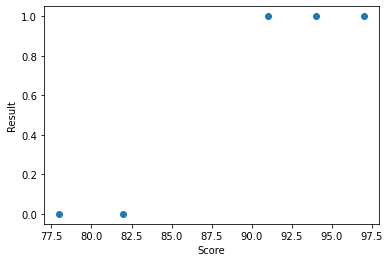

In [171]:
# 현재 데이터 시각화
plt.scatter(X, y)
plt.xlabel('Score')
plt.ylabel('Result')
plt.show()

### (3) 모델 생성 & 학습

In [172]:
model = LogisticRegression()

In [173]:
# 학습
model.fit(arrX, arrY)

LogisticRegression()

In [174]:
# 학습 후 설정된 속성
print('분류 종류 : ', model.classes_)
print('가중치 값 : ', model.coef_)
print('절 편  값 : ', model.intercept_)
print('특성 갯수 : ', model.n_features_in_)

분류 종류 :  [0 1]
가중치 값 :  [[0.62705118]]
절 편  값 :  [-54.1941992]
특성 갯수 :  1


### (4) 평가 => score() 학습용 데이터 점수, 테스트용 데이터 점수
---
- 2개 점수 비교해서 과대적합, 과소적합 체크

In [175]:
model.score(arrX, arrY)

1.0

In [176]:
### (5) 테스트 => predict() : 새로운 데이터로 진행
preY = model.predict(arrX)

preY

array([0, 0, 1, 1, 1])

In [177]:
# 1개 데이터
preY = model.predict([[87]])
print('예측 결과 : ', preY)

예측 결과 :  [1]


In [178]:
probaY = model.predict_proba([[82]])
print('분류항목 : ', model.classes_)
print('예측확률 : ', probaY)

분류항목 :  [0 1]
예측확률 :  [[0.94136517 0.05863483]]


In [179]:
# 결정함수
model.decision_function([[82]])

array([-2.77600232])

In [180]:
# y=Wx+b : 모델 파라미터
result = (model.coef_*82) + model.intercept_
print('result: ', result)

result:  [[-2.77600232]]


# 뉴욕시의 Taxi 데이터 활용한 예측 모델
---
- 데이터셋 : 케글의 NYC_taxi.csv
- 조건 : 뉴욕시 내
- 거리에 따른 요금 예측 ==> 회귀
- 승차에 따른 하차지역 예측 ==> 분류 (뭐든 상관 없음, KNN, 로지스틱)

### [1] 데이터 로딩

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [182]:
FILE='../EXAM_DL/DAY_0901/data/NYC_taxi.csv'

In [183]:
# 데이터 로딩
# nrows=로딩 데이터 수
df = pd.read_csv(FILE, nrows=5000, parse_dates=['pickup_datetime'])

In [184]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                5000 non-null   object             
 1   fare_amount        5000 non-null   float64            
 2   pickup_datetime    5000 non-null   datetime64[ns, UTC]
 3   pickup_longitude   5000 non-null   float64            
 4   pickup_latitude    5000 non-null   float64            
 5   dropoff_longitude  5000 non-null   float64            
 6   dropoff_latitude   5000 non-null   float64            
 7   passenger_count    5000 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 312.6+ KB


In [186]:
df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

### [2] 결측치 및 이상치 체크

In [187]:
df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [188]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,11.296238,-72.426826,39.867237,-72.426130,39.875767,1.631000
std,9.710106,10.722381,6.351342,10.722293,6.326084,1.257122
min,-2.900000,-74.438233,-73.991840,-74.429332,-73.979010,0.000000
25%,6.000000,-73.992449,40.734045,-73.991349,40.734379,1.000000
50%,8.500000,-73.982069,40.752128,-73.980196,40.753512,1.000000
75%,12.500000,-73.967040,40.766890,-73.963589,40.767636,2.000000
max,180.000000,40.751582,41.366138,40.758867,41.032598,6.000000


In [189]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


# 특성 새롭게 생성 => 거리 Feature
---
- 공식 : (x2-x1)^2 + (y2-y1)^2 계산 결과의 루트

In [190]:
distance = np.sqrt((df.pickup_latitude - df.dropoff_latitude)**2 + (df.pickup_longitude - df.dropoff_longitude)**2)

type(distance)

df['distance'] = distance

In [191]:
# 뉴욕시 내에서 승차/하차의 경우
p_long = (df['pickup_longitude'] >= -74.27) & (df['pickup_longitude'] <=-73.68)
d_long = (df['dropoff_longitude'] >= -74.27) & (df['dropoff_longitude'] <=-73.68)
p_lat = (df['pickup_latitude'] >= 40.49) & (df['pickup_latitude'] <= 40.92)
d_lat = (df['dropoff_latitude'] >= 40.49) & (df['dropoff_latitude'] <= 40.92)

In [192]:
df = df[p_long & d_long & p_lat & d_lat]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4885 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                4885 non-null   object             
 1   fare_amount        4885 non-null   float64            
 2   pickup_datetime    4885 non-null   datetime64[ns, UTC]
 3   pickup_longitude   4885 non-null   float64            
 4   pickup_latitude    4885 non-null   float64            
 5   dropoff_longitude  4885 non-null   float64            
 6   dropoff_latitude   4885 non-null   float64            
 7   passenger_count    4885 non-null   int64              
 8   distance           4885 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1), object(1)
memory usage: 381.6+ KB


In [193]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
count,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000
mean,11.235038,-73.975619,40.750647,-73.974395,40.751466,1.633982,0.034077
std,9.122513,0.034689,0.027256,0.034174,0.030591,1.261926,0.037798
min,-2.900000,-74.105395,40.614803,-74.183955,40.551710,0.000000,0.000000
25%,6.000000,-73.992778,40.735570,-73.991520,40.735819,1.000000,0.012717
50%,8.500000,-73.982305,40.752693,-73.980573,40.754296,1.000000,0.022075
75%,12.500000,-73.968542,40.767287,-73.965570,40.768088,2.000000,0.039700
max,85.500000,-73.776293,40.876747,-73.719100,40.896535,6.000000,0.247462


In [194]:
# fare_amount 컬럼 음수 컬럼 제거
# passenger_count, distance 컬럼 0 값 평균 값으로 채우기
df = df[df['fare_amount'] >= 0]
df.passenger_count[df['passenger_count'] == 0] = df.passenger_count.mean()
df.distance[df['distance'] == 0] = df.distance.mean()

In [195]:
# 모듈 로딩
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### [1] 데이터 준비

In [196]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0,0.009436
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0,0.079696
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0,0.013674
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0,0.025340
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0,0.019470
...,...,...,...,...,...,...,...,...,...
4995,2010-09-04 12:45:32.0000001,6.5,2010-09-04 12:45:32+00:00,-73.980622,40.745157,-73.975777,40.755863,1.0,0.011751
4996,2011-06-13 10:53:52.0000006,4.9,2011-06-13 10:53:52+00:00,-73.956664,40.766989,-73.961371,40.772639,1.0,0.007354
4997,2013-12-12 21:26:40.0000004,7.5,2013-12-12 21:26:40+00:00,-73.988707,40.734343,-73.991737,40.722582,1.0,0.012145
4998,2010-03-08 14:01:00.00000067,7.7,2010-03-08 14:01:00+00:00,-73.952795,40.776642,-73.965320,40.759412,5.0,0.021301


### [2] 분포 분석 => EDA => 시각화

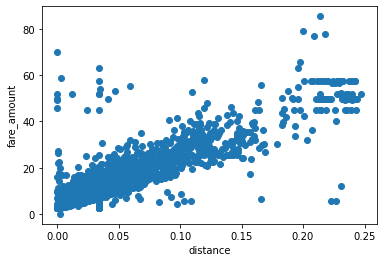

In [197]:
plt.scatter(df.distance, df.fare_amount)
plt.xlabel('distance')
plt.ylabel('fare_amount')
plt.show()

In [198]:
# 학습에 사용되는 형테로 데이터 변환
X = df.distance
y = df.fare_amount
print(X.shape, y.shape)

(4883,) (4883,)


In [199]:
arrX = np.array(X)
arrY = np.array(y)

# 1차원 -> 2차원
arrX = arrX.reshape(-1, 1)

### [3] 학습 방법 선택 및 모델 생성
---
- 시간에 따른 점수 예측
- 데이터 + 라벨 => 지도학습
- 선형 데이터 분포 => 선형 모델 적용

In [200]:
# 모델 객체 생성
model = LinearRegression()

In [201]:
# 학습 => 트레이닝 데이터 사용
# fit()메서드 => 2차원 형태 데이터
model.fit(arrX, arrY)

LinearRegression()

In [202]:
# 모델 파라미터 => w 가중치, b 절편
print('w: ', model.coef_, 'b: ', model.intercept_)

w:  [211.98145808] b:  3.944627722776305


### [4] 모델 평가
---
- 테스트(검증) 데이터로 평가
- score()
    - 분류: 정답 --- 예측답 => 맞춘 정도
        * 정확도(accuracy)
    - 회귀: 정답 -- 예측답 => 차이 오차(error)
        * 손심함수(Loss/Cost Function) : MSE, MAE, RMSE 낮을수록 좋음
        * R2 계수: 0 ~ 1 높을수록 좋음

In [203]:
# 회귀 => 결정계수 R^2 반환
model.score(arrX, arrY)

0.7658232527834817

In [204]:
# 오차 확인
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 예측값 추출
preY = model.predict(arrX)

mae = mean_absolute_error(arrY, preY)
mse = mean_squared_error(arrY, preY)

print(mae, mse)

2.2900987049010078 19.47360103417534


# 

In [205]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [206]:
iris = load_iris()

In [207]:
data = iris.data

In [208]:
target = iris.target

In [209]:
data.shape, target.shape, type(data), type(target)

((150, 4), (150,), numpy.ndarray, numpy.ndarray)

In [210]:
model = LogisticRegression()

In [211]:
model.fit(data, target)

LogisticRegression()

In [212]:
# 선형계수 즉 기울기w => 특성 Feature 마다 곱하기
print('classes_: ', model.classes_)
print('coef_: ', model.coef_)
print('intercept_: ', model.intercept_)

classes_:  [0 1 2]
coef_:  [[-0.41813284  0.96633399 -2.52102777 -1.08409539]
 [ 0.53029432 -0.31442411 -0.19947604 -0.94816287]
 [-0.11216148 -0.65190988  2.72050381  2.03225827]]
intercept_:  [  9.83776831   2.21827742 -12.05604573]


In [213]:
data[145:]

array([[6.7, 3. , 5.2, 2.3],
       [6.3, 2.5, 5. , 1.9],
       [6.5, 3. , 5.2, 2. ],
       [6.2, 3.4, 5.4, 2.3],
       [5.9, 3. , 5.1, 1.8]])

In [214]:
new_data = [6.7, 3. , 5.2, 2.3]

ret = model.decision_function([new_data])
print(ret)

[[-5.66748353  1.60992698  4.05755655]]


In [215]:
from scipy.special import softmax

# y=aw1 + bw2 + cw3 + dw4 + b
values = []
for i in range(3):
    y = model.coef_[i][0]*new_data[0] +\
        model.coef_[i][1]*new_data[1] +\
        model.coef_[i][2]*new_data[2] +\
        model.coef_[i][3]*new_data[3] + model.intercept_[i]
    print('y= ', y, end= ' ')
    values.append(y)
arrValue = np.array(values)
print('softmax => ', np.round(softmax(y)))

y=  -5.667483525664883 y=  1.6099269785436596 y=  4.057556547120633 softmax =>  1.0


In [216]:
np.round(softmax(ret), 3)

array([[0.  , 0.08, 0.92]])

# 

# SGDClassifier
---
- LogisticRegression에 SGD 경사하강법을 적용한 모델
- 필수 설정 파라미터
    - loss pram : 이진/다중 손실함수 이름 지정

# 

# SGD Classifier
---
- LogisticRegression + SGE(확률적경사하강법) 적용한 분류
- 필수 파라미터 => 손실함수 설정

In [217]:
# 모듈 로딩
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

In [218]:
# 경고 무시
# 향후 deprecated 된다는 경고 출력 막음
import warnings
warnings.filterwarnings(action='ignore')

In [219]:
# 파일 관련
FILE='../EXAM_DL/DAY_0902/data/fish.csv'

### [1] 데이터 준비
---

In [220]:
fish = pd.read_csv(FILE)

In [221]:
print(fish.shape, fish.columns, sep='\n\n')

(159, 6)

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')


In [222]:
fish.columns[1:]

Index(['Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [223]:
# 특성 데이터 + 타겟 불리
fish_input =  fish[fish.columns[1:]].to_numpy()
fish_target = fish.Species.to_numpy()

In [224]:
# 학습용, 테스트용 데이터 분리 => 8 :2
# random_state: 학습 시 랜덤한 동일 데이터로 진행 위해 사용
train_input, test_input, train_target, test_target = train_test_split(
fish_input, fish_target, test_size=0.2, random_state=42)

In [225]:
# 표준화 평균 0, 표준편차 1
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### [2] 모델 생성 및 함수

In [226]:
from sklearn.linear_model import SGDClassifier

In [227]:
# 최적화 경사하강법 변경 => BGD => SGD
# loss = 손실함수: 모델에 따라 다름 => 'log' 곧 deprecated
# max_iter = 1000 기본값: 학습 횟수
sc = SGDClassifier(loss='log',
                  max_iter=10,
                  random_state=42)
# 학습 진행 fit(): 반복 횟수 즉 max_iter 만큼 학습 진행
sc.fit(train_scaled, train_target)

SGDClassifier(loss='log', max_iter=10, random_state=42)

In [228]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7480314960629921
0.84375


In [229]:
# partial_fit - 1 epoch만 학습 진행
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7480314960629921
0.8125


### 학습 횟수(epoch)와 과/소적합

In [230]:
# 기본 max_iter = 1000
sc = SGDClassifier(loss='log', random_state=42)

train_score=[]
test_score=[]

# 분류 항목
classes = np.unique(train_target)

In [231]:
print('classes: ', classes)

classes:  ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [232]:
# epoch 수 변화 시키며 모델 평가
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

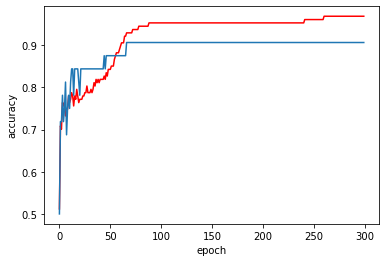

In [233]:
import matplotlib.pyplot as plt

plt.plot(train_score, color='r')
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [234]:
# 최적 epoch 수로 학습 진행
sc = SGDClassifier(loss='log', max_iter=2000, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
print(sc.n_iter_)

0.9606299212598425
0.90625
2000


In [235]:
# early_stopping : 조기종료 여부 (기:False)
# n_iter_no_change : n번 동안 변경되지 않은 경우 early_stopping이 True
# tol : 성능 개선의 기준값
sc = SGDClassifier(loss='log', tol=1.0,
                  random_state=42,
                  n_iter_no_change=10,
                  early_stopping=True)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
print(sc.n_iter_)  # _ 붙은 것은 학습이 다 되어야지 나옴?

0.6771653543307087
0.65625
11


# 

# LogisticRegression
---
- 인공신경망의 기본 개념과 동일
- Regression이지만 이진분류로 사용
- 선형모델 기반으로 y=wx+b 그대로 사용
- y=wx+b의 결과 => 분류 변화 함수 => softmax()

### 성적 - 합격/불합격 분류 실습

In [236]:
# 사용 모듈 로딩
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

### (1) 데이터 준비

In [237]:
X=[78,82,91,94,97]  # 점수
y=[0,0,1,1,1]  # 학점

In [238]:
# 학습에 사용할 수 있도록 형 변환
arrX = np.array(X).reshape(-1, 1)
arrY = np.array(y)

In [239]:
# 데이터 체크
print('arrX : ', arrX.shape, 'arrY : ', arrY.shape)

arrX :  (5, 1) arrY :  (5,)


### (2) 데이터 확인 => 시각화

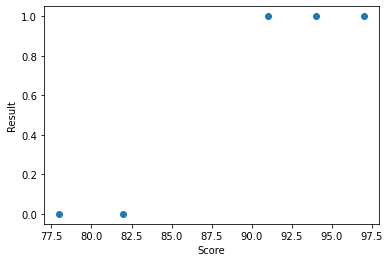

In [240]:
# 현재 데이터 시각화
plt.scatter(X, y)
plt.xlabel('Score')
plt.ylabel('Result')
plt.show()

### [3] 모델 생성 & 학습

In [241]:
model = LogisticRegression()

In [242]:
# 학습
model.fit(arrX, arrY)

LogisticRegression()

In [243]:
# 학습 후 설정된 속성
print('분류 종류 : ', model.classes_)
print('가중치 값 : ', model.coef_)
print('절 편  값 : ', model.intercept_)
print('특성 갯수 : ', model.n_features_in_)

분류 종류 :  [0 1]
가중치 값 :  [[0.62705118]]
절 편  값 :  [-54.1941992]
특성 갯수 :  1


### [4] 평가 => score() 학습용 데이터 점수, 테스트용 데이터 점수
---
- 2개 점수 비교해서 과대적합, 과소적합 체크

In [244]:
model.score(arrX, arrY)

1.0

### [5] 테스트 => predict() : 새로운 데이터로 진행

In [245]:
preY = model.predict(arrX)

preY

array([0, 0, 1, 1, 1])

In [246]:
# 1개 데이터
preY = model.predict([[87]])
print('예측결과 : ', preY)

예측결과 :  [1]


In [247]:
probaY = model.predict_proba([[82]])
print('분류항목 : ', model.classes_)
print('예측확률 : ', probaY)

분류항목 :  [0 1]
예측확률 :  [[0.94136517 0.05863483]]


In [248]:
# 결정함수
ret=model.decision_function([[82]])
ret

array([-2.77600232])

In [249]:
# y=Wx+b : 모델 파라미터
result = (model.coef_*82) + model.intercept_
print('result : ', result)

result :  [[-2.77600232]]


In [250]:
# 시그모이드 함수 / 소프트맥스 후 결과 확인
from scipy.special import softmax, expit
sigValue2 = softmax(ret)
print(np.round(sigValue2, 5))

[1.]


# 

# LogisticRegression binary
---
- 인공신경망의 기본 개념과 동일
- Regression이지만 이진분류(Binary Classification)으로 사용
- 션형모델 기반으로 y=wx+b 그대로 사용
- y=wx+b의 결과 => 분류 변환 함수 => scipy.special.expit()

### 성적 - 합격/불합격 분류 실습

In [251]:
# 사용 모듈 로딩
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

### (1) 데이터 준비

In [252]:
X=[82,85,87,92,94,97]  # 점수
y=['B','B','B','A','A','A']  # 학점

In [253]:
# 학습에 사용할 수 있도록 형변환
arrX = np.array(X).reshape(-1, 1)
arrY = np.array(y)

In [254]:
# 데이터 체크
print('arrX: ', arrX.shape, 'arrY: ', arrY.shape)

arrX:  (6, 1) arrY:  (6,)


### (2) 데이터 확인 => 시각화

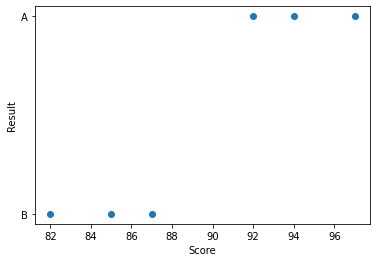

In [255]:
# 현재 데이터 시각화
plt.scatter(X, y)
plt.xlabel('Score')
plt.ylabel('Result')
plt.show()

###  모델 생성 & 학습

In [256]:
model=LogisticRegression()

In [257]:
# 학습
model.fit(arrX, arrY)

LogisticRegression()

In [258]:
# 학습 후 설정된 속성
print('분류 종류 : ', model.classes_)
print('가중치 값 : ', model.coef_)
print('절 편  값 : ', model.intercept_)
print('특성 갯수 : ', model.n_features_in_)

분류 종류 :  ['A' 'B']
가중치 값 :  [[-0.8204321]]
절 편  값 :  [73.42867468]
특성 갯수 :  1


### [4] 평가 => score() 학습용 데이터 점수, 테스트용 데이터 점수
---
- 2개 점수 비교해서 과대적합, 과소적합 체크

In [259]:
model.score(arrX, arrY)

1.0

### [5] 테스트 => predict(): 새로운 데이터로 진행

In [260]:
preY=model.predict(arrX)

preY

array(['B', 'B', 'B', 'A', 'A', 'A'], dtype='<U1')

In [261]:
# 1개 데이터
preY=model.predict([[87]])

print('예측결과 : ', preY)

예측결과 :  ['B']


In [262]:
probaY=model.predict_proba([[87]])
print('분류항목 : ', model.classes_)
print('예측확률 : ', probaY)

분류항목 :  ['A' 'B']
예측확률 :  [[0.11394314 0.88605686]]


In [263]:
# 결정함수 y=wx+b
ret=model.decision_function([[87]])
print(np.round(ret, 3))

[2.051]


In [264]:
# y=Wx+b : 모델 파라미터
result=(model.coef_*87) + model.intercept_
print('result : ', np.round(result, 3))

result :  [[2.051]]


In [265]:
# 시그모이드 함수 expit(ax+b) 후 결과 확인
# predict_proba() 함수의 양성에 대한 결과와 동일
from scipy.special import expit
sigValue2=expit(ret)
print('예측확률 : ', np.round(sigValue2, 5))
print('예측확률 : ', np.round(probaY, 5))

예측확률 :  [0.88606]
예측확률 :  [[0.11394 0.88606]]


# 

# LogisticRegression multi
---
- 인공신경망의 기본 개념과 동일
- Regression이지만 다중분류로 사용
- 선형모델 기반으로 y=wx+b 그대로 사용
- y=wx+b의 결과 => 분류 변환 함수 => softmax()

### 성적 - 합격/불합격 분류 실습

In [266]:
# 사용 모듈 로딩
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

### (1) 데이터 준비

In [267]:
X=[71,74,78,82,85,87,92,94,97]  # 점수
y=['C','C','C','B','B','B','A','A','A']  # 학점

In [268]:
# 학습에 사용할 수 있도록 형변환
arrX = np.array(X).reshape(-1, 1)
arrY = np.array(y)

In [269]:
# 데이터 체크
print('arrX: ', arrX.shape, 'arrY : ', arrY.shape)

arrX:  (9, 1) arrY :  (9,)


### 데이터 확인 => 시각화

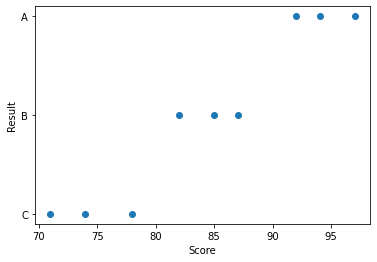

In [270]:
# 현재 데이터 시각화
plt.scatter(X, y)
plt.xlabel('Score')
plt.ylabel('Result')
plt.show()

### [3] 모델 생성 & 학습

In [271]:
model = LogisticRegression()

In [272]:
# 학습
model.fit(arrX, arrY)

LogisticRegression()

In [273]:
# 학습 후 설정된 속성
print('분류 종류 : ', model.classes_)
print('가중치 값 : ', model.coef_)
print('절 편  값 : ', model.intercept_)
print('특성 갯수 : ', model.n_features_in_)

분류 종류 :  ['A' 'B' 'C']
가중치 값 :  [[ 0.81689356]
 [-0.00293966]
 [-0.8139539 ]]
절 편  값 :  [-70.52883025   2.84206703  67.68676322]
특성 갯수 :  1


### [4] 평가 => score() 학습용 데이터 점수, 테스트용 데이터 점수
---
- 2개 점수 비교해서 과대적합, 과소적합 체크

In [274]:
model.score(arrX, arrY)

1.0

### [5] 테스트 => predict() : 새로운 데이터로 진행

In [275]:
preY=model.predict(arrX)

preY

array(['C', 'C', 'C', 'B', 'B', 'B', 'A', 'A', 'A'], dtype='<U1')

In [276]:
# 1개 데이터
preY=model.predict([[87]])

print('예측결과 : ', preY)

예측결과 :  ['B']


In [277]:
probaY=model.predict_proba([[87]])
print('분류항목: ', model.classes_)
print('예측확률: ', probaY)

분류항목:  ['A' 'B' 'C']
예측확률:  [[0.11418348 0.88290209 0.00291442]]


In [278]:
# 결정함수 y=wx+b
ret=model.decision_function([[87]])
print(np.round(ret, 3))

[[ 0.541  2.586 -3.127]]


In [279]:
# y=wx+b : 모델 파라미터
result=(model.coef_*87) + model.intercept_
print('result : ', np.round(result, 3))

result :  [[   0.541   73.912  138.757]
 [ -70.785    2.586   67.431]
 [-141.343  -67.972   -3.127]]


In [280]:
# 다중분류 소프트맥스 함수 softmax(ax+b) 후 결과 확인
# predict_proba() 함수의 양성에 대한 결과와 동일
from scipy.special import softmax
sigValue2 = softmax(ret)
print('예측확률 : ', np.round(sigValue2, 5))
print('예측확률 : ', np.round(probaY, 5))

예측확률 :  [[0.11418 0.8829  0.00291]]
예측확률 :  [[0.11418 0.8829  0.00291]]


# 

# SVM(Support Vector Machine)
---
- ML에서 오랫동안 연구되었고 성능이 좋은 모델
- DL볻 성능이 좋은 경우도 있음

In [281]:
# 모듈 로딩
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

### [1] 데이터 준비
---

(1797, 64)


<Figure size 432x288 with 0 Axes>

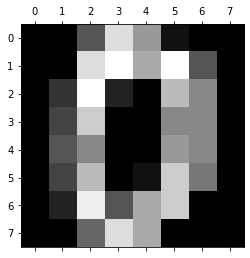

In [282]:
digits = load_digits()
print(digits.data.shape)

import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [283]:
digit = load_digits()

In [284]:
# data, target 분리
data = digit['data']
target = digit['target']

In [285]:
print(f'data : {data.shape}, target : {target.shape}')

data : (1797, 64), target : (1797,)


In [286]:
print(f'data[0]: {data[0]}')

data[0]: [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [287]:
print(f'target : {target[2]} - imamge[2] \n\n{digit["images"][2]}')

target : 2 - imamge[2] 

[[ 0.  0.  0.  4. 15. 12.  0.  0.]
 [ 0.  0.  3. 16. 15. 14.  0.  0.]
 [ 0.  0.  8. 13.  8. 16.  0.  0.]
 [ 0.  0.  1.  6. 15. 11.  0.  0.]
 [ 0.  1.  8. 13. 15.  1.  0.  0.]
 [ 0.  9. 16. 16.  5.  0.  0.  0.]
 [ 0.  3. 13. 16. 16. 11.  5.  0.]
 [ 0.  0.  0.  3. 11. 16.  9.  0.]]


### [2] 학습용 & 테스트용

In [288]:
train_input, test_input, train_target, test_target = train_test_split(
data, target, random_state=42)

### [3] 모델 생성
---
- 0 ~ 9 : 10개 분류
- LR, SVC

- 모델 객체 생성
- 모델.fit()
- 모델.score()
- <- 성능 튜닝(하이퍼파라미어)
- 모델.predict([[]])